<h2>Kaksinkertainen eksponentiaalinen tasoitus</h2>

Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.

Holtin malli huomioi trendin, mutta ei huomioi kausivaihtelua.

Eksponentiaalinen tasoitus löytyy <b>statsmodels.tsa</b>-kirjastosta.

Mallin hyvyyttä kuvaava statistiikka löytyy <b>sklearn.metrics</b>-kirjastosta.

Lisätietoa https://tilastoapu.wordpress.com/2018/08/30/aikasarjaennustaminen-2/

Tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä kausivaihtelu, jonka malli jättää huomiotta!

<h3>Aikasarjaan tutustuminen</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Tiedoston avaaminen
df = pd.read_excel('http://taanila.fi/aikasarja.xlsx')
df

,Vuosineljännes,Kysyntä
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450
5,2015-03-31,350
6,2015-06-30,200
7,2015-09-30,300
8,2015-12-31,350
9,2016-03-31,200


In [3]:
#Aikaleimat indeksiin
#to_datetime muuntaa merkkijonomuotoisen tiedon aikaleimoiksi
#format mahdollistaa erilaisten esitysmuotojen tunnistamisen aikaleimoiksi
df.index = pd.to_datetime(df['Vuosineljännes'], format = "%Y-%m-%d")

#Pudotetaan tarpeettomaksi käynyt sarake pois
df = df.drop('Vuosineljännes', axis = 1)
df

,Kysyntä
Vuosineljännes,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450
2015-03-31,350
2015-06-30,200
2015-09-30,300
2015-12-31,350


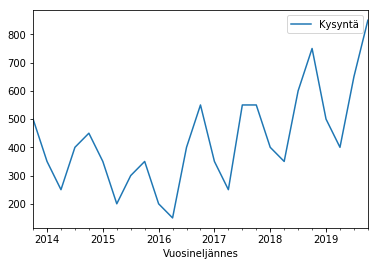

In [4]:
#Aikasarja viivakaaviona
df.plot()

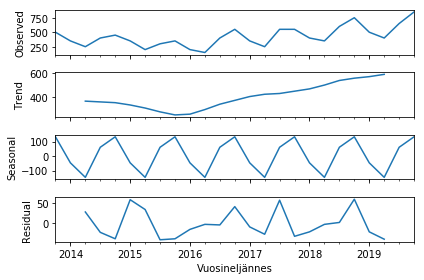

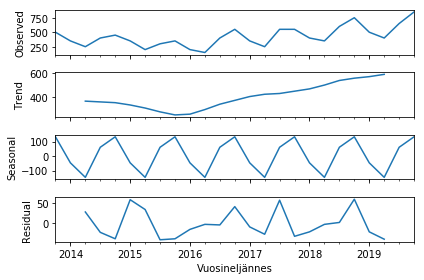

In [5]:
#Aikasarjan vaihtelua aiheuttavien komponenttien erottelu
#Observed=alkuperäinen aikasarja, Trend=trendi, Seasonal=kausivaihtelu,
#Residual=muu kuin trendiin ja kausivaihteluun liittyvä vaihtelu
#Jos kaaviot tulostuvat kahteen kertaan, niin siitä ei kannata huolestua

from statsmodels.tsa.api import seasonal_decompose

seasonal_decompose(df['Kysyntä']).plot()

<h3>Mallin sovitus</h3>

Ennustemalli sovitetaan (<b>fit()</b>) dataan.
Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi <b>malli</b>), joka sisältää monenlaista tietoa mallista.

In [6]:
from statsmodels.tsa.api import ExponentialSmoothing

#Trendi huomioidaan (trend='add')
malli = ExponentialSmoothing(df['Kysyntä'], trend = 'add').fit()

D:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
D:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [7]:
#malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Ennuste'] = malli.fittedvalues
df

,Kysyntä,Ennuste
Vuosineljännes,,
2013-12-31,500,409.187614
2014-03-31,350,437.857214
2014-06-30,250,415.893524
2014-09-30,400,363.708562
2014-12-31,450,364.807804
2015-03-31,350,383.652138
2015-06-30,200,370.392827
2015-09-30,300,311.825014
2015-12-31,350,292.485387


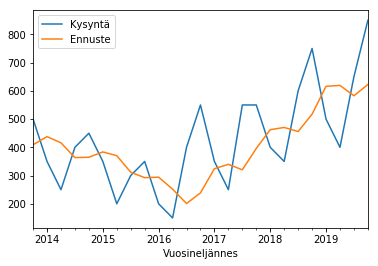

In [8]:
#Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
#Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2013-12-31,500,409.187614,90.812386
2014-03-31,350,437.857214,-87.857214
2014-06-30,250,415.893524,-165.893524
2014-09-30,400,363.708562,36.291438
2014-12-31,450,364.807804,85.192196
2015-03-31,350,383.652138,-33.652138
2015-06-30,200,370.392827,-170.392827
2015-09-30,300,311.825014,-11.825014
2015-12-31,350,292.485387,57.514613


<h3>Mallin hyvyys</h3>

Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
<ul><li>ennustevirheiden neliöiden keskiarvoa (MSE = mean squared error)</li>
    <li>ennustevirheiden itseisarvojen keskiarvoa (MAD = mean absolute deviation)</li>
    <li>ennustevirheiden aikasarjaa viivakaaviona</li>
    <li>ennusteiden ja toteutuneiden arvojen hajontakaaviota</li></ul>

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mean squared error', mean_squared_error(df['Kysyntä'], df['Ennuste']))
print('mean absolute error', mean_absolute_error(df['Kysyntä'], df['Ennuste']))

mean squared error 21508.783792989914
mean absolute error 125.37908354219827


Text(0, 0.5, 'Ennustevirhe')

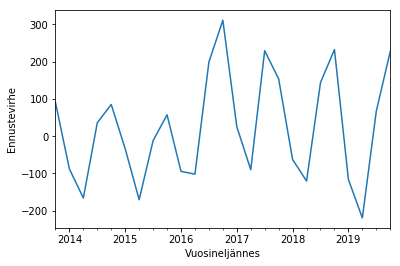

In [11]:
#Ennustevirheet aikasarjana
#On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

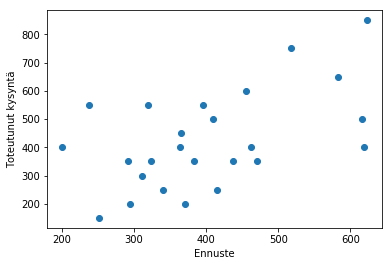

In [12]:
#Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
#vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Kysyntä'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

<h3>Ennusteiden laskeminen</h3>

Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
<ul><li>ensimmäisen ennustettavan ajankohdan aikaleima</li>
    <li>ennustettavien ajankohtien lukumäärä (periods)</li>
    <li>ennustettavien ajankohtien frekvenssi (freq)</li></ul>
        
Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [13]:
#Ennustettavien ajankohtien aikaleimat (alkupäivänä ensimmäisen ennusteen aikaleima)
index = pd.date_range('2020-03-31', periods = 4, freq = 'Q')

#Ennusteet neljälle vuosineljännekselle
ennusteet = malli.forecast(4)

#Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

D:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
D:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
D:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


,Ennuste
2020-03-31,717.185481
2020-06-30,754.538439
2020-09-30,791.891398
2020-12-31,829.244357


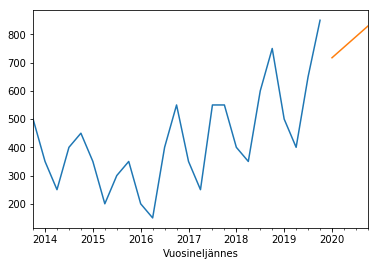

In [14]:
#Viivakaavio havainnoista
df['Kysyntä'].plot()

#Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [15]:
#Ennusteet alkuperäisen aikasarjan perään
df = pd.concat([df, df_ennuste])
df

D:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Ennuste,Ennustevirhe,Kysyntä
2013-12-31,409.187614,90.812386,500.0
2014-03-31,437.857214,-87.857214,350.0
2014-06-30,415.893524,-165.893524,250.0
2014-09-30,363.708562,36.291438,400.0
2014-12-31,364.807804,85.192196,450.0
2015-03-31,383.652138,-33.652138,350.0
2015-06-30,370.392827,-170.392827,200.0
2015-09-30,311.825014,-11.825014,300.0
2015-12-31,292.485387,57.514613,350.0
2016-03-31,294.284661,-94.284661,200.0


<h3>Mallin statistiikkaa</h3>

malli-oliosta löytyy monenlaista statistiikkaa. Mallin parametrit on laskettu siten että mean squared error saadaan mahdollisimman pieneksi.

In [16]:
malli.params

{'smoothing_level': 0.25213126982732664,
 'smoothing_slope': 0.2521311899925906,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 409.18761409566923,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}